In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/spaceship-titanic/train.csv')
df_test = pd.read_csv('./data/spaceship-titanic/test.csv')

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
df.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,6563_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gwendy Sykess
freq,1,4602,5439,8,5915,8291,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
df.drop_duplicates()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [9]:
df.drop(['Name'], axis=1, inplace=True)

# Zmienna celu

In [10]:
df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

<Axes: xlabel='Transported', ylabel='count'>

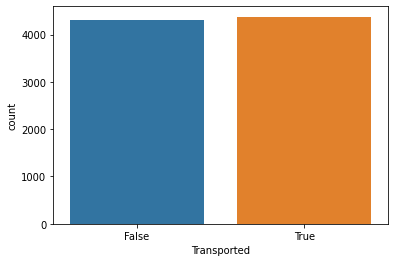

In [11]:
sns.countplot(x='Transported', data=df)

# Zmienne kategoryczne

In [12]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [13]:
df['Cabin'] = df['Cabin'].apply(lambda x: str(x)[-1])

In [14]:
df_test['Cabin'] = df_test['Cabin'].apply(lambda x: str(x)[-1])

In [15]:
char_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin']

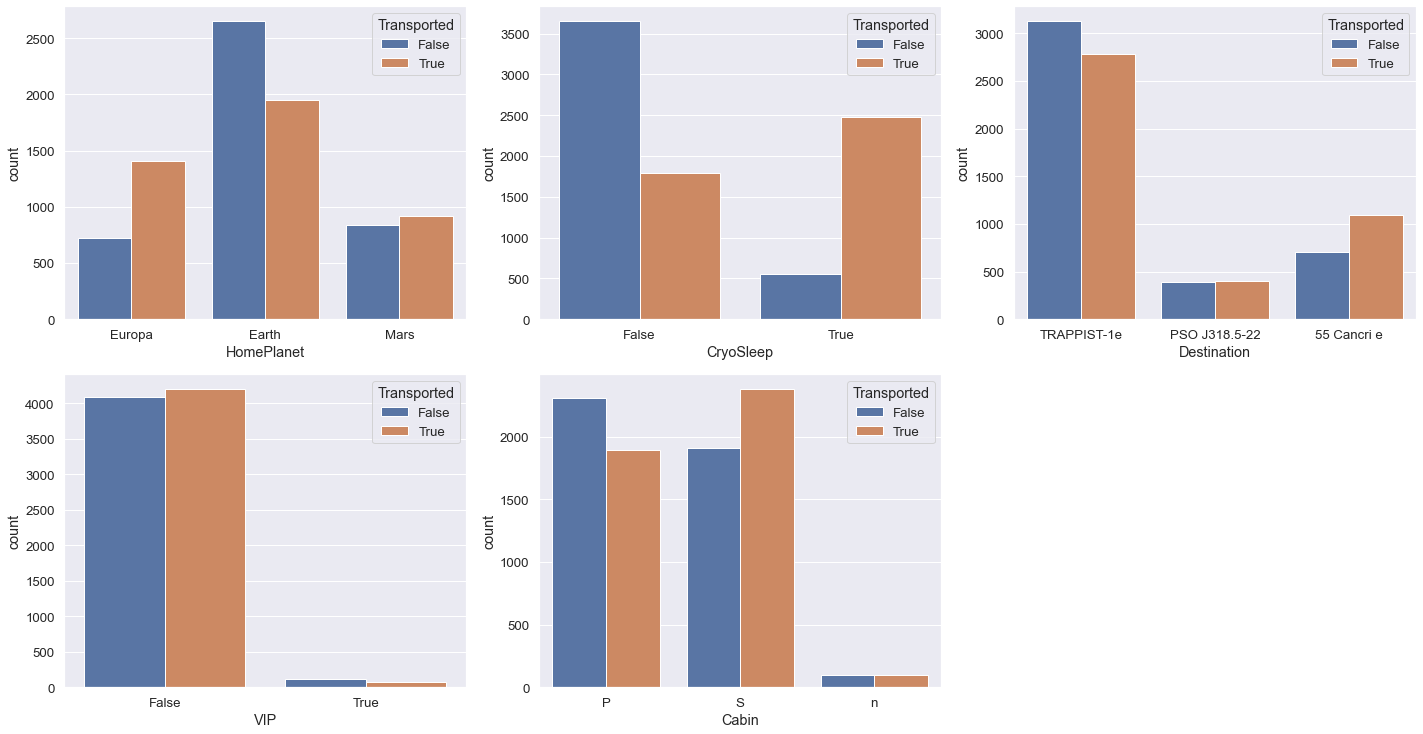

In [16]:
plt.figure(figsize=(20,15))
# sns.set_style('ticks')
sns.set(font="Verdana")
sns.set(font_scale = 1.2)

for i, feature in enumerate(char_cols):
    plt.subplot(3,3, i+1)
    sns.countplot(x=feature, data=df, hue='Transported')
    plt.tight_layout()

# Zmienne ilościowe

In [17]:
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [18]:
for i in num_cols:
    print(df[i].value_counts())

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
75.0      4
78.0      3
79.0      3
77.0      2
76.0      2
Name: Age, Length: 80, dtype: int64
0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
263.0        1
3103.0       1
1973.0       1
782.0        1
1174.0       1
Name: RoomService, Length: 1273, dtype: int64
0.0       5456
1.0        116
2.0         75
4.0         53
3.0         53
          ... 
1863.0       1
5412.0       1
661.0        1
2324.0       1
1174.0       1
Name: FoodCourt, Length: 1507, dtype: int64
0.0       5587
1.0        153
2.0         80
3.0         59
4.0         45
          ... 
2011.0       1
2778.0       1
239.0        1
2728.0       1
620.0        1
Name: ShoppingMall, Length: 1115, dtype: int64
0.0       5324
1.0        146
2.0        105
3.0         53
5.0         53
          ... 
2810.0       1
5432.0       1
4864.0       1
2043.0       1
1159.0       1
Name: Spa, Length: 1327, dtype: int

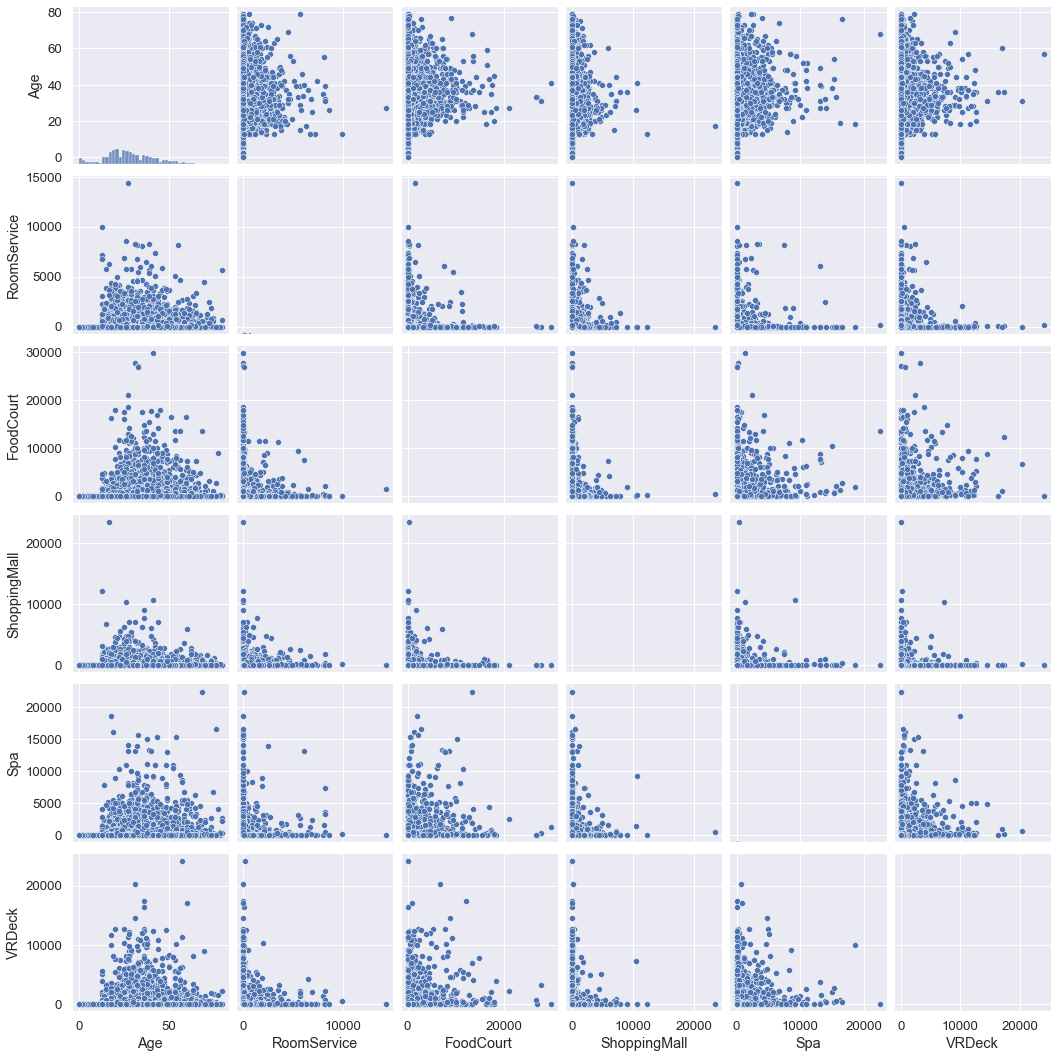

In [19]:
sns.pairplot(df[num_cols])

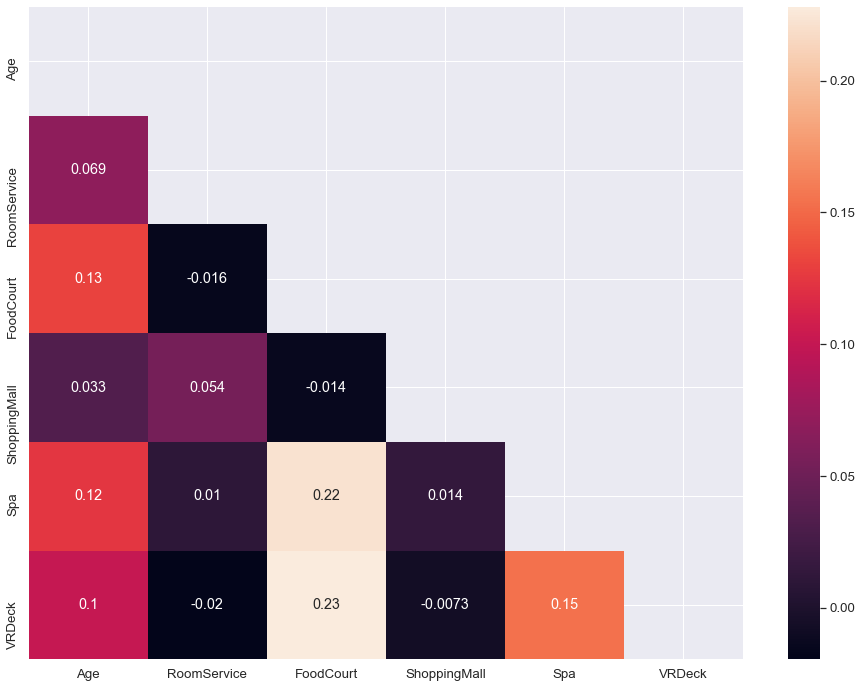

In [20]:
corr_matrix = df[num_cols].corr() 
upper_matrix = np.triu(corr_matrix)
plt.subplots(figsize=(16,12)) 
sns.heatmap(corr_matrix, annot=True, mask=upper_matrix) 
plt.show()

Brak jakiejkolwiek zależności pomiędzy zmiennymi ilościowymi

# Braki danych

In [21]:
# X = df.drop('Transported', axis=1)
# y = df['Transported']
X = df
y = df_test

In [22]:
y

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,n,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [23]:
X.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin             0
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

# Zmienna Destination

In [24]:
X['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [25]:
X['Destination'] = np.where(X['Destination'].isna(), 'TRAPPIST-1e', X['Destination'])

In [26]:
y['Destination'] = np.where(y['Destination'].isna(), 'TRAPPIST-1e', y['Destination'])

# Zmienna CryoSleep

In [27]:
X['Xtra'] = X['RoomService'] + X['FoodCourt'] + X['ShoppingMall'] + X['Spa'] + X['VRDeck']

In [28]:
y['Xtra'] = y['RoomService'] + y['FoodCourt'] + y['ShoppingMall'] + y['Spa'] + y['VRDeck']

In [29]:
X['CS'] = np.where(X['Xtra']>0, False, True)

In [30]:
y['CS'] = np.where(y['Xtra']>0, False, True)

In [31]:
X['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [32]:
X['CryoSleep'] = np.where(X['CryoSleep'].isna(), X['CS'], X['CryoSleep'])

In [33]:
y['CryoSleep'] = np.where(y['CryoSleep'].isna(), y['CS'], y['CryoSleep'])

# Zmienna HomePlanet

In [34]:
X['HomePlanet'] = np.where(X['HomePlanet'].isna(), 'Earth', X['HomePlanet'])

In [35]:
y['HomePlanet'] = np.where(y['HomePlanet'].isna(), 'Earth', y['HomePlanet'])

# Zmienna VIP

In [36]:
X['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [37]:
X['VIP'] = np.where(X['VIP'].isna(), False , X['VIP'])

In [38]:
y['VIP'] = np.where(y['VIP'].isna(), False , y['VIP'])

# Zmienna Age

In [39]:
X['Age'].value_counts()

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
75.0      4
78.0      3
79.0      3
77.0      2
76.0      2
Name: Age, Length: 80, dtype: int64

In [40]:
X['Age'].isna().sum()

179

In [41]:
aaa = X.groupby('CryoSleep').agg({'Age' : 'median'})

In [42]:
bbb = y.groupby('CryoSleep').agg({'Age' : 'median'})

In [43]:
age_agg = X.groupby(['HomePlanet', 'VIP']).agg({'Age': 'mean'})

In [44]:
age_agg2 = y.groupby(['HomePlanet', 'VIP']).agg({'Age': 'mean'})

In [45]:
X = pd.merge(X, age_agg, how='left', on=['HomePlanet', 'VIP']) 

In [46]:
y = pd.merge(y, age_agg2, how='left', on=['HomePlanet', 'VIP']) 

In [47]:
X['Age'] = np.where(X['Age_x'].isna(), X['Age_y'].round(), X['Age_x'])

In [48]:
y['Age'] = np.where(y['Age_x'].isna(), y['Age_y'].round(), y['Age_x'])

In [49]:
X.drop(['Age_x', 'Age_y'], axis=1, inplace=True)

In [50]:
y.drop(['Age_x', 'Age_y'], axis=1, inplace=True)

In [51]:
X

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Xtra,CS,Age
0,0001_01,Europa,False,P,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,False,0.0,True,39.0
1,0002_01,Earth,False,S,TRAPPIST-1e,False,109.0,9.0,25.0,549.0,44.0,True,736.0,False,24.0
2,0003_01,Europa,False,S,TRAPPIST-1e,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,False,58.0
3,0003_02,Europa,False,S,TRAPPIST-1e,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0,False,33.0
4,0004_01,Earth,False,S,TRAPPIST-1e,False,303.0,70.0,151.0,565.0,2.0,True,1091.0,False,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,P,55 Cancri e,True,0.0,6819.0,0.0,1643.0,74.0,False,8536.0,False,41.0
8689,9278_01,Earth,True,S,PSO J318.5-22,False,0.0,0.0,0.0,0.0,0.0,False,0.0,True,18.0
8690,9279_01,Earth,False,S,TRAPPIST-1e,False,0.0,0.0,1872.0,1.0,0.0,True,1873.0,False,26.0
8691,9280_01,Europa,False,S,55 Cancri e,False,0.0,1049.0,0.0,353.0,3235.0,False,4637.0,False,32.0


In [52]:
X.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Xtra            908
CS                0
Age               0
dtype: int64

# Zmienna RoomService

In [53]:
X['RoomService'].describe()

count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      14327.000000
Name: RoomService, dtype: float64

In [54]:
X.groupby('Cabin').agg({'RoomService' : 'median'})

,RoomService
Cabin,
P,0.0
S,0.0
n,0.0


In [55]:
rs_agg = X.groupby(['HomePlanet', 'CryoSleep']).agg({'RoomService': 'mean'})

In [56]:
rs_agg2 = y.groupby(['HomePlanet', 'CryoSleep']).agg({'RoomService': 'mean'})

In [57]:
rs_agg

RoomService
HomePlanet CryoSleep             
Earth      False       202.906182
           True          1.683390
Europa     False       259.190231
           True          1.924569
Mars       False       909.009542
           True          0.000000

In [58]:
X = pd.merge(X, rs_agg, how='left', on=['HomePlanet', 'CryoSleep']) 

In [59]:
y = pd.merge(y, rs_agg2, how='left', on=['HomePlanet', 'CryoSleep']) 

In [60]:
X['RoomService'] = np.where(X['RoomService_x'].isna(), X['RoomService_y'].round(), X['RoomService_x'])

In [61]:
y['RoomService'] = np.where(y['RoomService_x'].isna(), y['RoomService_y'].round(), y['RoomService_x'])

In [62]:
X.drop(['RoomService_x', 'RoomService_y'], axis=1, inplace=True)

In [63]:
y.drop(['RoomService_x', 'RoomService_y'], axis=1, inplace=True)

In [64]:
X

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Xtra,CS,Age,RoomService
0,0001_01,Europa,False,P,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,False,0.0,True,39.0,0.0
1,0002_01,Earth,False,S,TRAPPIST-1e,False,9.0,25.0,549.0,44.0,True,736.0,False,24.0,109.0
2,0003_01,Europa,False,S,TRAPPIST-1e,True,3576.0,0.0,6715.0,49.0,False,10383.0,False,58.0,43.0
3,0003_02,Europa,False,S,TRAPPIST-1e,False,1283.0,371.0,3329.0,193.0,False,5176.0,False,33.0,0.0
4,0004_01,Earth,False,S,TRAPPIST-1e,False,70.0,151.0,565.0,2.0,True,1091.0,False,16.0,303.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,P,55 Cancri e,True,6819.0,0.0,1643.0,74.0,False,8536.0,False,41.0,0.0
8689,9278_01,Earth,True,S,PSO J318.5-22,False,0.0,0.0,0.0,0.0,False,0.0,True,18.0,0.0
8690,9279_01,Earth,False,S,TRAPPIST-1e,False,0.0,1872.0,1.0,0.0,True,1873.0,False,26.0,0.0
8691,9280_01,Europa,False,S,55 Cancri e,False,1049.0,0.0,353.0,3235.0,False,4637.0,False,32.0,0.0


In [65]:
X.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
VIP               0
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Xtra            908
CS                0
Age               0
RoomService       0
dtype: int64

# Zmienna FoodCourt

In [66]:
cc = ['HomePlanet', 'CryoSleep', 'VIP', 'Cabin']

In [67]:
for i in cc:
    print(X.groupby(i).agg({'FoodCourt' : 'mean'}))

              FoodCourt
HomePlanet             
Earth        142.534226
Europa      1503.212950
Mars          54.361999
            FoodCourt
CryoSleep            
False      716.080405
True         2.061789
         FoodCourt
VIP               
False   426.672839
True   1811.393782
        FoodCourt
Cabin            
P      425.092080
S      490.235238
n      461.701031


In [68]:
fc_agg = X.groupby(['HomePlanet', 'CryoSleep', 'VIP']).agg({'FoodCourt': 'mean'})
X = pd.merge(X, fc_agg, how='left', on=['HomePlanet', 'CryoSleep', 'VIP']) 
X['FoodCourt'] = np.where(X['FoodCourt_x'].isna(), X['FoodCourt_y'].round(), X['FoodCourt_x'])
X.drop(['FoodCourt_x', 'FoodCourt_y'], axis=1, inplace=True)

In [69]:
fc_agg2 = y.groupby(['HomePlanet', 'CryoSleep', 'VIP']).agg({'FoodCourt': 'mean'})
y = pd.merge(y, fc_agg2, how='left', on=['HomePlanet', 'CryoSleep', 'VIP']) 
y['FoodCourt'] = np.where(y['FoodCourt_x'].isna(), y['FoodCourt_y'].round(), y['FoodCourt_x'])
y.drop(['FoodCourt_x', 'FoodCourt_y'], axis=1, inplace=True)

In [70]:
X.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
VIP               0
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Xtra            908
CS                0
Age               0
RoomService       0
FoodCourt         0
dtype: int64

# Zmienna ShoppingMall

In [71]:
X['ShoppingMall'].describe()

count     8485.000000
mean       173.729169
std        604.696458
min          0.000000
25%          0.000000
50%          0.000000
75%         27.000000
max      23492.000000
Name: ShoppingMall, dtype: float64

In [72]:
for i in cc:
    print(X.groupby(i).agg({'ShoppingMall' : 'mean'}))

            ShoppingMall
HomePlanet              
Earth         134.198548
Europa        151.132820
Mars          308.445734
           ShoppingMall
CryoSleep              
False        270.669546
True           0.453022
       ShoppingMall
VIP                
False    171.997708
True     247.726804
       ShoppingMall
Cabin              
P        187.635786
S        162.091970
n        132.862944


In [73]:
sm_agg = X.groupby(['CryoSleep', 'HomePlanet']).agg({'ShoppingMall': 'mean'})

In [74]:
sm_agg2 = y.groupby(['CryoSleep', 'HomePlanet']).agg({'ShoppingMall': 'mean'})

In [75]:
sm_agg

ShoppingMall
CryoSleep HomePlanet              
False     Earth         194.121634
          Europa        270.037833
          Mars          507.595033
True      Earth           0.949071
          Europa          0.000000
          Mars            0.000000

In [76]:
X = pd.merge(X, sm_agg, how='left', on=['CryoSleep', 'HomePlanet']) 

In [77]:
y = pd.merge(y, sm_agg2, how='left', on=['CryoSleep', 'HomePlanet']) 

In [78]:
X

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,ShoppingMall_x,Spa,VRDeck,Transported,Xtra,CS,Age,RoomService,FoodCourt,ShoppingMall_y
0,0001_01,Europa,False,P,TRAPPIST-1e,False,0.0,0.0,0.0,False,0.0,True,39.0,0.0,0.0,270.037833
1,0002_01,Earth,False,S,TRAPPIST-1e,False,25.0,549.0,44.0,True,736.0,False,24.0,109.0,9.0,194.121634
2,0003_01,Europa,False,S,TRAPPIST-1e,True,0.0,6715.0,49.0,False,10383.0,False,58.0,43.0,3576.0,270.037833
3,0003_02,Europa,False,S,TRAPPIST-1e,False,371.0,3329.0,193.0,False,5176.0,False,33.0,0.0,1283.0,270.037833
4,0004_01,Earth,False,S,TRAPPIST-1e,False,151.0,565.0,2.0,True,1091.0,False,16.0,303.0,70.0,194.121634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,P,55 Cancri e,True,0.0,1643.0,74.0,False,8536.0,False,41.0,0.0,6819.0,270.037833
8689,9278_01,Earth,True,S,PSO J318.5-22,False,0.0,0.0,0.0,False,0.0,True,18.0,0.0,0.0,0.949071
8690,9279_01,Earth,False,S,TRAPPIST-1e,False,1872.0,1.0,0.0,True,1873.0,False,26.0,0.0,0.0,194.121634
8691,9280_01,Europa,False,S,55 Cancri e,False,0.0,353.0,3235.0,False,4637.0,False,32.0,0.0,1049.0,270.037833


In [79]:
X['ShoppingMall'] = np.where(X['ShoppingMall_x'].isna(), X['ShoppingMall_y'].round(), X['ShoppingMall_x'])

In [80]:
y['ShoppingMall'] = np.where(y['ShoppingMall_x'].isna(), y['ShoppingMall_y'].round(), y['ShoppingMall_x'])

In [81]:
X.drop(['ShoppingMall_x', 'ShoppingMall_y'], axis=1, inplace=True)

In [82]:
y.drop(['ShoppingMall_x', 'ShoppingMall_y'], axis=1, inplace=True)

In [83]:
X.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
VIP               0
Spa             183
VRDeck          188
Transported       0
Xtra            908
CS                0
Age               0
RoomService       0
FoodCourt         0
ShoppingMall      0
dtype: int64

# Zmienna Spa

In [84]:
for i in cc:
    print(X.groupby(i).agg({'ShoppingMall' : 'mean'}))
    print(X.groupby(i).agg({'ShoppingMall' : 'median'}))

            ShoppingMall
HomePlanet              
Earth         133.229024
Europa        150.414829
Mars          308.486640
            ShoppingMall
HomePlanet              
Earth                0.0
Europa               0.0
Mars                 0.0
           ShoppingMall
CryoSleep              
False        270.806312
True           0.457433
           ShoppingMall
CryoSleep              
False               2.0
True                0.0
       ShoppingMall
VIP                
False    171.082647
True     250.678392
       ShoppingMall
VIP                
False           0.0
True            0.0
       ShoppingMall
Cabin              
P        186.422254
S        161.565765
n        131.532663
       ShoppingMall
Cabin              
P               0.0
S               0.0
n               0.0


In [85]:
spa_agg = X.groupby(['HomePlanet', 'CryoSleep', 'Cabin']).agg({'Spa': 'mean'})
X = pd.merge(X, spa_agg, how='left', on=['HomePlanet', 'CryoSleep', 'Cabin']) 
X['Spa'] = np.where(X['Spa_x'].isna(), X['Spa_y'].round(), X['Spa_x'])
X.drop(['Spa_x', 'Spa_y'], axis=1, inplace=True)

In [86]:
spa_agg2 = y.groupby(['HomePlanet', 'CryoSleep', 'Cabin']).agg({'Spa': 'mean'})
y = pd.merge(y, spa_agg2, how='left', on=['HomePlanet', 'CryoSleep', 'Cabin']) 
y['Spa'] = np.where(y['Spa_x'].isna(), y['Spa_y'].round(), y['Spa_x'])
y.drop(['Spa_x', 'Spa_y'], axis=1, inplace=True)

In [87]:
X

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,VRDeck,Transported,Xtra,CS,Age,RoomService,FoodCourt,ShoppingMall,Spa
0,0001_01,Europa,False,P,TRAPPIST-1e,False,0.0,False,0.0,True,39.0,0.0,0.0,0.0,0.0
1,0002_01,Earth,False,S,TRAPPIST-1e,False,44.0,True,736.0,False,24.0,109.0,9.0,25.0,549.0
2,0003_01,Europa,False,S,TRAPPIST-1e,True,49.0,False,10383.0,False,58.0,43.0,3576.0,0.0,6715.0
3,0003_02,Europa,False,S,TRAPPIST-1e,False,193.0,False,5176.0,False,33.0,0.0,1283.0,371.0,3329.0
4,0004_01,Earth,False,S,TRAPPIST-1e,False,2.0,True,1091.0,False,16.0,303.0,70.0,151.0,565.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,P,55 Cancri e,True,74.0,False,8536.0,False,41.0,0.0,6819.0,0.0,1643.0
8689,9278_01,Earth,True,S,PSO J318.5-22,False,0.0,False,0.0,True,18.0,0.0,0.0,0.0,0.0
8690,9279_01,Earth,False,S,TRAPPIST-1e,False,0.0,True,1873.0,False,26.0,0.0,0.0,1872.0,1.0
8691,9280_01,Europa,False,S,55 Cancri e,False,3235.0,False,4637.0,False,32.0,0.0,1049.0,0.0,353.0


In [88]:
X.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
VIP               0
VRDeck          188
Transported       0
Xtra            908
CS                0
Age               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
dtype: int64

# Zmienna VRDeck

In [89]:
for i in cc:
    print(X.groupby(i).agg({'VRDeck' : 'mean'}))
    print(X.groupby(i).agg({'VRDeck' : 'median'}))

                VRDeck
HomePlanet            
Earth       144.390961
Europa      875.765998
Mars         47.440698
            VRDeck
HomePlanet        
Earth          0.0
Europa         0.0
Mars           0.0
               VRDeck
CryoSleep            
False      473.966826
True         6.835336
           VRDeck
CryoSleep        
False         4.0
True          0.0
            VRDeck
VIP               
False   283.031649
True   1234.856410
       VRDeck
VIP          
False     0.0
True     30.0
           VRDeck
Cabin            
P      315.586349
S      296.849750
n      250.410256
       VRDeck
Cabin        
P         0.0
S         0.0
n         0.0


In [90]:
vr_agg = X.groupby(['HomePlanet', 'CryoSleep', 'VIP']).agg({'VRDeck': 'mean'})
X = pd.merge(X, vr_agg, how='left', on=['HomePlanet', 'CryoSleep', 'VIP']) 
X['VRDeck'] = np.where(X['VRDeck_x'].isna(), X['VRDeck_y'].round(), X['VRDeck_x'])
X.drop(['VRDeck_x', 'VRDeck_y'], axis=1, inplace=True)

In [91]:
vr_agg2 = y.groupby(['HomePlanet', 'CryoSleep', 'VIP']).agg({'VRDeck': 'mean'})
y = pd.merge(y, vr_agg2, how='left', on=['HomePlanet', 'CryoSleep', 'VIP']) 
y['VRDeck'] = np.where(y['VRDeck_x'].isna(), y['VRDeck_y'].round(), y['VRDeck_x'])
y.drop(['VRDeck_x', 'VRDeck_y'], axis=1, inplace=True)

In [92]:
X

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Transported,Xtra,CS,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0001_01,Europa,False,P,TRAPPIST-1e,False,False,0.0,True,39.0,0.0,0.0,0.0,0.0,0.0
1,0002_01,Earth,False,S,TRAPPIST-1e,False,True,736.0,False,24.0,109.0,9.0,25.0,549.0,44.0
2,0003_01,Europa,False,S,TRAPPIST-1e,True,False,10383.0,False,58.0,43.0,3576.0,0.0,6715.0,49.0
3,0003_02,Europa,False,S,TRAPPIST-1e,False,False,5176.0,False,33.0,0.0,1283.0,371.0,3329.0,193.0
4,0004_01,Earth,False,S,TRAPPIST-1e,False,True,1091.0,False,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,P,55 Cancri e,True,False,8536.0,False,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,9278_01,Earth,True,S,PSO J318.5-22,False,False,0.0,True,18.0,0.0,0.0,0.0,0.0,0.0
8690,9279_01,Earth,False,S,TRAPPIST-1e,False,True,1873.0,False,26.0,0.0,0.0,1872.0,1.0,0.0
8691,9280_01,Europa,False,S,55 Cancri e,False,False,4637.0,False,32.0,0.0,1049.0,0.0,353.0,3235.0


# Zmienna Xtra

In [93]:
X['Xtra'] = np.where(X['Xtra'].isna(), 0 , X['Xtra'])

In [94]:
y['Xtra'] = np.where(y['Xtra'].isna(), 0 , y['Xtra'])

In [95]:
X

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Transported,Xtra,CS,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0001_01,Europa,False,P,TRAPPIST-1e,False,False,0.0,True,39.0,0.0,0.0,0.0,0.0,0.0
1,0002_01,Earth,False,S,TRAPPIST-1e,False,True,736.0,False,24.0,109.0,9.0,25.0,549.0,44.0
2,0003_01,Europa,False,S,TRAPPIST-1e,True,False,10383.0,False,58.0,43.0,3576.0,0.0,6715.0,49.0
3,0003_02,Europa,False,S,TRAPPIST-1e,False,False,5176.0,False,33.0,0.0,1283.0,371.0,3329.0,193.0
4,0004_01,Earth,False,S,TRAPPIST-1e,False,True,1091.0,False,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,P,55 Cancri e,True,False,8536.0,False,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,9278_01,Earth,True,S,PSO J318.5-22,False,False,0.0,True,18.0,0.0,0.0,0.0,0.0,0.0
8690,9279_01,Earth,False,S,TRAPPIST-1e,False,True,1873.0,False,26.0,0.0,0.0,1872.0,1.0,0.0
8691,9280_01,Europa,False,S,55 Cancri e,False,False,4637.0,False,32.0,0.0,1049.0,0.0,353.0,3235.0


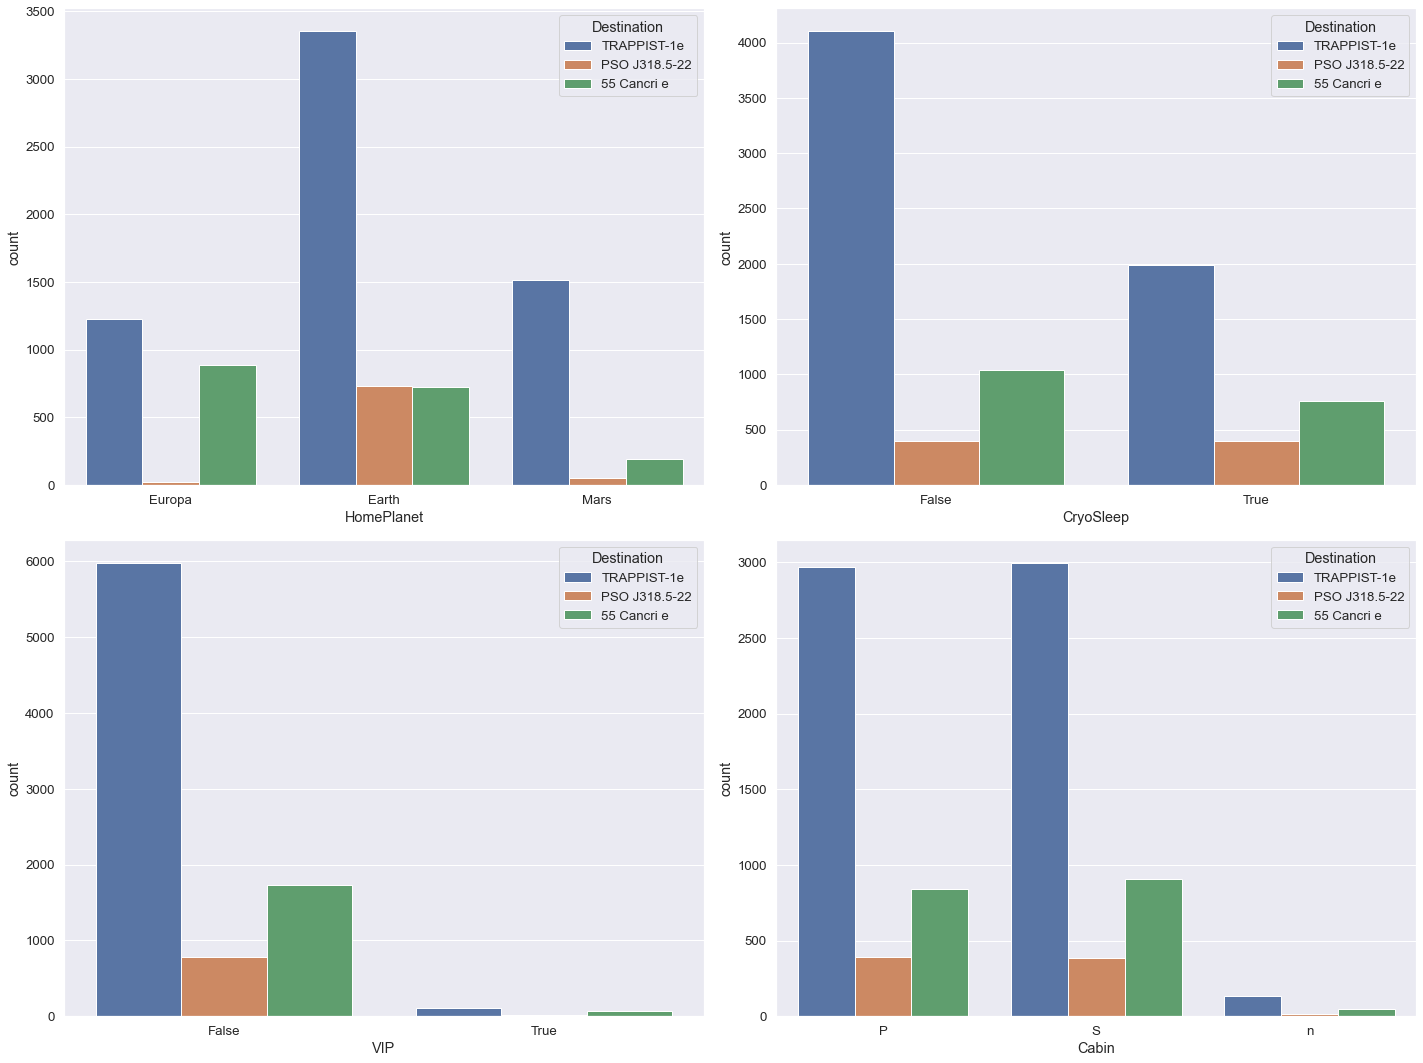

In [96]:
plt.figure(figsize=(20,15))
# sns.set_style('ticks')
sns.set(font="Verdana")
sns.set(font_scale = 1.2)

for i, feature in enumerate(cc):
    plt.subplot(2,2, i+1)
    sns.countplot(x=feature, data=X, hue='Destination')
    plt.tight_layout()

# wartości odstające

In [97]:
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Xtra']

Age
0.423002779120467


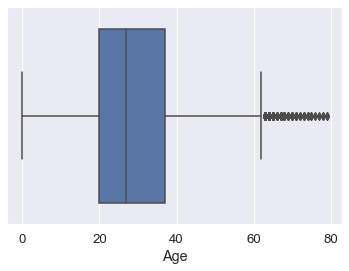

RoomService
6.369639366322376


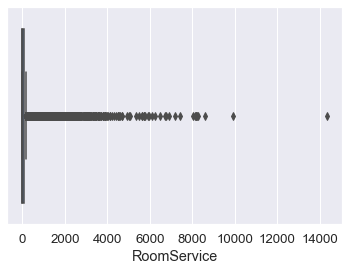

FoodCourt
7.13173661924956


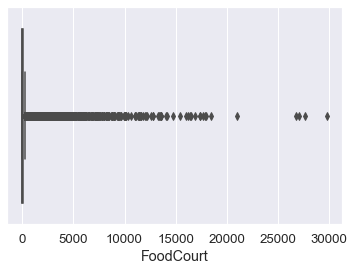

ShoppingMall
12.749785131886844


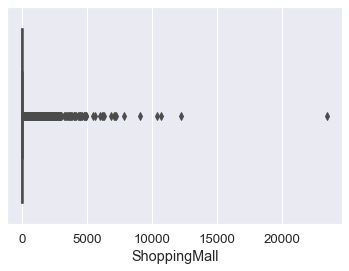

Spa
7.683639829585011


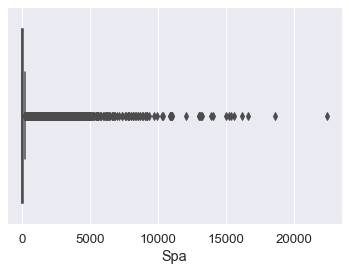

VRDeck
7.8719487160521595


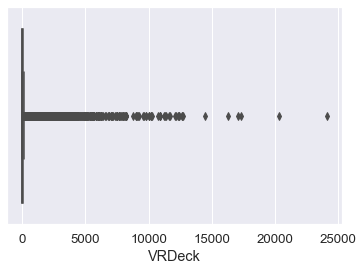

Xtra
4.516059617732796


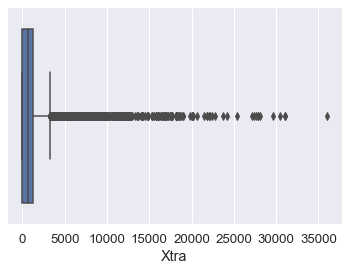

In [98]:
sns.set_style('ticks')
sns.set(font_scale=1.2)

for i in num_cols:
    print(i)
    print(X[i].skew())
    sns.boxplot(data=X, x=i)
    plt.show()

In [99]:
for var in num_cols:
    min = X[var].min()
    if (min >= 0):
        if (min == 0):
            X[var + '_log'] = np.log(X[var] + 1 + np.abs(min))
#             X_train[var + '_log'] = np.log(X_train[var] + 1 + np.abs(min))
            X[var + '_log'] = np.log(X[var] + 1)
        else:
            X[var + '_log'] = np.log(X[var])
            X[var + '_log'] = np.log(X[var])

In [100]:
for var in num_cols:
    min = y[var].min()
    if (min >= 0):
        if (min == 0):
            y[var + '_log'] = np.log(y[var] + 1 + np.abs(min))
#             X_train[var + '_log'] = np.log(X_train[var] + 1 + np.abs(min))
            y[var + '_log'] = np.log(y[var] + 1)
        else:
            y[var + '_log'] = np.log(y[var])
            y[var + '_log'] = np.log(y[var])

In [101]:
for var in num_cols:
    print('Zmienna', var)
    print('Współczynnik skońności przed:', X[var].skew())
    print('Transformata logarytmiczna', np.log10(X[var].skew()))
    print('Transformata pierwiastkowa', np.sqrt(X[var].skew()))
    print('------------------')

Zmienna Age
Współczynnik skońności przed: 0.423002779120467
Transformata logarytmiczna -0.3736567793088382
Transformata pierwiastkowa 0.6503866381779895
------------------
Zmienna RoomService
Współczynnik skońności przed: 6.369639366322376
Transformata logarytmiczna 0.8041148443212445
Transformata pierwiastkowa 2.523814447680807
------------------
Zmienna FoodCourt
Współczynnik skońności przed: 7.13173661924956
Transformata logarytmiczna 0.8531952959561085
Transformata pierwiastkowa 2.6705311492752823
------------------
Zmienna ShoppingMall
Współczynnik skońności przed: 12.749785131886844
Transformata logarytmiczna 1.1055028658035277
Transformata pierwiastkowa 3.5706841265907077
------------------
Zmienna Spa
Współczynnik skońności przed: 7.683639829585011
Transformata logarytmiczna 0.8855669991243502
Transformata pierwiastkowa 2.7719379195041527
------------------
Zmienna VRDeck
Współczynnik skońności przed: 7.8719487160521595
Transformata logarytmiczna 0.8960822561031496
Transformata

In [102]:
X

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Transported,Xtra,CS,Age,...,ShoppingMall,Spa,VRDeck,Age_log,RoomService_log,FoodCourt_log,ShoppingMall_log,Spa_log,VRDeck_log,Xtra_log
0,0001_01,Europa,False,P,TRAPPIST-1e,False,False,0.0,True,39.0,...,0.0,0.0,0.0,3.688879,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0002_01,Earth,False,S,TRAPPIST-1e,False,True,736.0,False,24.0,...,25.0,549.0,44.0,3.218876,4.700480,2.302585,3.258097,6.309918,3.806662,6.602588
2,0003_01,Europa,False,S,TRAPPIST-1e,True,False,10383.0,False,58.0,...,0.0,6715.0,49.0,4.077537,3.784190,8.182280,0.000000,8.812248,3.912023,9.248021
3,0003_02,Europa,False,S,TRAPPIST-1e,False,False,5176.0,False,33.0,...,371.0,3329.0,193.0,3.526361,0.000000,7.157735,5.918894,8.110728,5.267858,8.551981
4,0004_01,Earth,False,S,TRAPPIST-1e,False,True,1091.0,False,16.0,...,151.0,565.0,2.0,2.833213,5.717028,4.262680,5.023881,6.338594,1.098612,6.995766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,P,55 Cancri e,True,False,8536.0,False,41.0,...,0.0,1643.0,74.0,3.737670,0.000000,8.827615,0.000000,7.404888,4.317488,9.052165
8689,9278_01,Earth,True,S,PSO J318.5-22,False,False,0.0,True,18.0,...,0.0,0.0,0.0,2.944439,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8690,9279_01,Earth,False,S,TRAPPIST-1e,False,True,1873.0,False,26.0,...,1872.0,1.0,0.0,3.295837,0.000000,0.000000,7.535297,0.693147,0.000000,7.535830
8691,9280_01,Europa,False,S,55 Cancri e,False,False,4637.0,False,32.0,...,0.0,353.0,3235.0,3.496508,0.000000,6.956545,0.000000,5.869297,8.082093,8.442039


In [103]:
X.drop(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Xtra'], axis=1, inplace=True)

In [104]:
y.drop(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Xtra'], axis=1, inplace=True)

In [105]:
X

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Transported,CS,Age_log,RoomService_log,FoodCourt_log,ShoppingMall_log,Spa_log,VRDeck_log,Xtra_log
0,0001_01,Europa,False,P,TRAPPIST-1e,False,False,True,3.688879,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0002_01,Earth,False,S,TRAPPIST-1e,False,True,False,3.218876,4.700480,2.302585,3.258097,6.309918,3.806662,6.602588
2,0003_01,Europa,False,S,TRAPPIST-1e,True,False,False,4.077537,3.784190,8.182280,0.000000,8.812248,3.912023,9.248021
3,0003_02,Europa,False,S,TRAPPIST-1e,False,False,False,3.526361,0.000000,7.157735,5.918894,8.110728,5.267858,8.551981
4,0004_01,Earth,False,S,TRAPPIST-1e,False,True,False,2.833213,5.717028,4.262680,5.023881,6.338594,1.098612,6.995766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,P,55 Cancri e,True,False,False,3.737670,0.000000,8.827615,0.000000,7.404888,4.317488,9.052165
8689,9278_01,Earth,True,S,PSO J318.5-22,False,False,True,2.944439,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8690,9279_01,Earth,False,S,TRAPPIST-1e,False,True,False,3.295837,0.000000,0.000000,7.535297,0.693147,0.000000,7.535830
8691,9280_01,Europa,False,S,55 Cancri e,False,False,False,3.496508,0.000000,6.956545,0.000000,5.869297,8.082093,8.442039


In [106]:
char_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin']

In [107]:
for feature in char_cols:
    dummies = pd.get_dummies(X[feature], prefix=feature)  # stworzenie kolumn dummies
    mask = X[feature].mode().values[0]  # znalezienie najczęstszej wartości
    col_name = feature+'_'+str(mask)
    
    # łączenie zbioru z treningowym i usunięcie niepotrzebnych zmiennych
    X = pd.concat([X,dummies],axis=1)
    X.drop(feature, axis=1, inplace=True)
    X.drop(col_name, axis=1, inplace=True)

In [108]:
for feature in char_cols:
    dummies = pd.get_dummies(y[feature], prefix=feature)  # stworzenie kolumn dummies
    mask = y[feature].mode().values[0]  # znalezienie najczęstszej wartości
    col_name = feature+'_'+str(mask)
    
    # łączenie zbioru z treningowym i usunięcie niepotrzebnych zmiennych
    y = pd.concat([y,dummies],axis=1)
    y.drop(feature, axis=1, inplace=True)
    y.drop(col_name, axis=1, inplace=True)

In [109]:
X

,PassengerId,Transported,CS,Age_log,RoomService_log,FoodCourt_log,ShoppingMall_log,Spa_log,VRDeck_log,Xtra_log,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,VIP_True,Cabin_P,Cabin_n
0,0001_01,False,True,3.688879,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,0,1,0
1,0002_01,True,False,3.218876,4.700480,2.302585,3.258097,6.309918,3.806662,6.602588,0,0,0,0,0,0,0,0
2,0003_01,False,False,4.077537,3.784190,8.182280,0.000000,8.812248,3.912023,9.248021,1,0,0,0,0,1,0,0
3,0003_02,False,False,3.526361,0.000000,7.157735,5.918894,8.110728,5.267858,8.551981,1,0,0,0,0,0,0,0
4,0004_01,True,False,2.833213,5.717028,4.262680,5.023881,6.338594,1.098612,6.995766,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,False,False,3.737670,0.000000,8.827615,0.000000,7.404888,4.317488,9.052165,1,0,0,1,0,1,1,0
8689,9278_01,False,True,2.944439,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,0,1,0,0,0
8690,9279_01,True,False,3.295837,0.000000,0.000000,7.535297,0.693147,0.000000,7.535830,0,0,0,0,0,0,0,0
8691,9280_01,False,False,3.496508,0.000000,6.956545,0.000000,5.869297,8.082093,8.442039,1,0,0,1,0,0,0,0


In [110]:
X.drop(['CS'], axis=1, inplace=True)

In [111]:
y.drop(['CS'], axis=1, inplace=True)

# Wybór zmiennych do modelowania

In [112]:
corr_matrix = X.corr()

In [113]:
upper_matrix = np.triu(corr_matrix)

<Axes: >

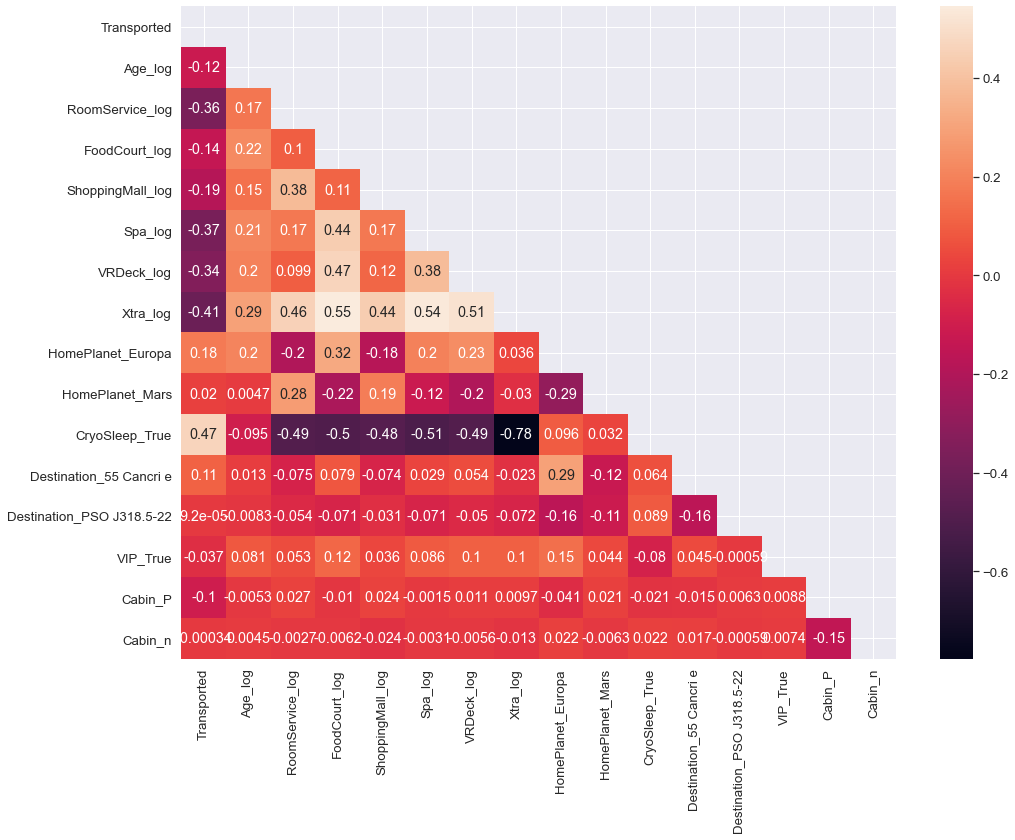

In [114]:
plt.subplots(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, mask=upper_matrix)

# zmienne powyżej 0.2 korelacji z Transported

In [115]:
corr_trans = corr_matrix['Transported']

In [116]:
features_corr = np.abs(corr_trans).sort_values()[np.abs(corr_trans).sort_values() >= 0.2].index

In [117]:
features_corr = [i for i in features_corr if i!='Transported']

In [118]:
features_corr

['VRDeck_log', 'RoomService_log', 'Spa_log', 'Xtra_log', 'CryoSleep_True']

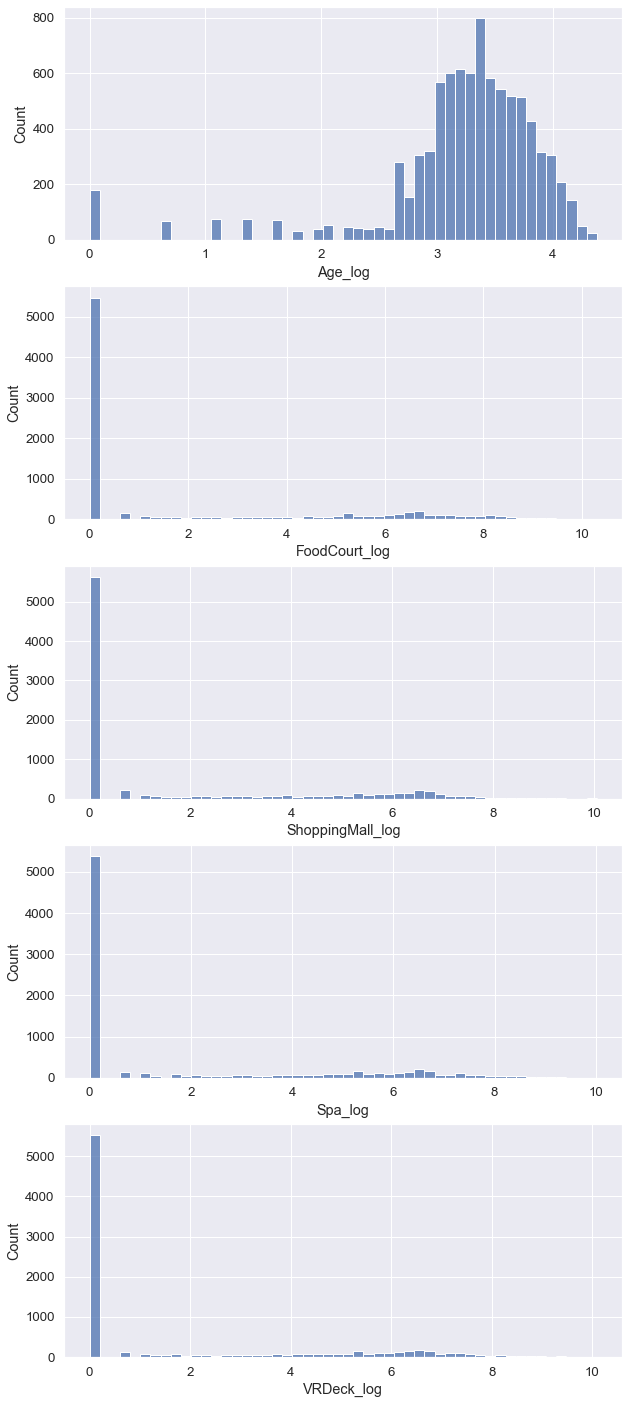

In [119]:
fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(X['Age_log'], color='b', bins=50, ax=ax[0]);
sns.histplot(X['FoodCourt_log'], color='b', bins=50, ax=ax[1]);
sns.histplot(X['ShoppingMall_log'], color='b', bins=50, ax=ax[2]);
sns.histplot(X['Spa_log'], color='b', bins=50, ax=ax[3]);
sns.histplot(X['VRDeck_log'], color='b', bins=50, ax=ax[4]);

In [120]:
X_train = X.drop('Transported', axis=1)
y_train = X['Transported']

In [121]:
y

,PassengerId,Name,Age_log,RoomService_log,FoodCourt_log,ShoppingMall_log,Spa_log,VRDeck_log,Xtra_log,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,VIP_True,Cabin_P,Cabin_n
0,0013_01,Nelly Carsoning,3.332205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,0,0,0,0,0
1,0018_01,Lerome Peckers,2.995732,0.000000,2.302585,0.000000,7.945910,0.000000,7.949091,0,0,0,0,0,0,0,0
2,0019_01,Sabih Unhearfus,3.465736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,1,1,0,0,0,0
3,0021_01,Meratz Caltilter,3.663562,0.000000,8.802823,0.000000,5.204007,6.373320,8.911800,1,0,0,0,0,0,0,0
4,0023_01,Brence Harperez,3.044522,2.397895,0.000000,6.455199,0.000000,0.000000,6.470800,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Jeron Peter,3.555348,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,0,0,0,0,0
4273,9269_01,Matty Scheron,3.761200,0.000000,6.742881,2.890372,2.397895,4.976734,6.926577,0,0,0,0,0,0,0,1
4274,9271_01,Jayrin Pore,3.433987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,1,1,0,0,1,0
4275,9273_01,Kitakan Conale,3.555348,0.000000,7.893945,0.000000,0.000000,6.261492,8.072155,1,0,0,0,0,0,1,0


In [122]:
X_test = y

# Modelowanie XGBoost

In [123]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: xgboost in c:\users\krzysiek\anaconda3\lib\site-packages (1.7.4)




[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [124]:
from xgboost import XGBClassifier

In [125]:
from sklearn.model_selection import RandomizedSearchCV

In [126]:
params = {
    'max_depth': np.arange(3,10), # maksymalna glebokosc drzewa
    'min_child_weight': np.arange(8,15), # minimalna liczba próbek, które musi mieć węzeł
    'gamma': np.arange(0,0.5,0.1), # minimalny spadek wartości funkcji straty, aby węzeł został dokonany
    'subsample': [i/10 for i in range(6,11)], # jaki udział wszystkich obserwacji wybierany jest przy każdym kolejnym podziale
    'colsample_bytree': [i/10 for i in range(6,11)], # max_features (udział wszystkich zmiennych w modelu)
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100], # moc regularyzacji
    'n_estimators': np.arange(10,150,30), # liczba drzew
    'learning_rate': [0.01, 0.1, 0.2, 0.3] # stopień w jakim informacje sa przekazywane kolejnym drzewom
}

In [127]:
xgb = XGBClassifier(objective= 'binary:logistic')

In [128]:
random_search = RandomizedSearchCV(estimator=xgb,
                                  param_distributions=params,
                                  cv=5, n_jobs=-1, scoring = "roc_auc", n_iter = 1000, random_state=88)

In [129]:
X_train.drop(['PassengerId'], axis=1, inplace=True)

In [130]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': array([0. , 0.1, 0.2, 0.3, 0.4]),
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_child_weight': array([ 8,  9, 10, 11, 12, 13, 14]),
                                        'n_estimators': array([ 10,  40,  70, 100, 130]),
                                        'reg_alpha': [1e-05, 0.01, 0.1, 1, 100],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=88, scoring='roc_auc')

In [131]:
xgb_opt = random_search.best_estimator_

In [132]:
X_train

,Age_log,RoomService_log,FoodCourt_log,ShoppingMall_log,Spa_log,VRDeck_log,Xtra_log,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,VIP_True,Cabin_P,Cabin_n
0,3.688879,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,0,1,0
1,3.218876,4.700480,2.302585,3.258097,6.309918,3.806662,6.602588,0,0,0,0,0,0,0,0
2,4.077537,3.784190,8.182280,0.000000,8.812248,3.912023,9.248021,1,0,0,0,0,1,0,0
3,3.526361,0.000000,7.157735,5.918894,8.110728,5.267858,8.551981,1,0,0,0,0,0,0,0
4,2.833213,5.717028,4.262680,5.023881,6.338594,1.098612,6.995766,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,3.737670,0.000000,8.827615,0.000000,7.404888,4.317488,9.052165,1,0,0,1,0,1,1,0
8689,2.944439,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,0,1,0,0,0
8690,3.295837,0.000000,0.000000,7.535297,0.693147,0.000000,7.535830,0,0,0,0,0,0,0,0
8691,3.496508,0.000000,6.956545,0.000000,5.869297,8.082093,8.442039,1,0,0,1,0,0,0,0


In [133]:
X_test.drop(['PassengerId', 'Name'], axis=1, inplace=True)

In [134]:
X_test

,Age_log,RoomService_log,FoodCourt_log,ShoppingMall_log,Spa_log,VRDeck_log,Xtra_log,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,VIP_True,Cabin_P,Cabin_n
0,3.332205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,0,0,0,0,0
1,2.995732,0.000000,2.302585,0.000000,7.945910,0.000000,7.949091,0,0,0,0,0,0,0,0
2,3.465736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,1,1,0,0,0,0
3,3.663562,0.000000,8.802823,0.000000,5.204007,6.373320,8.911800,1,0,0,0,0,0,0,0
4,3.044522,2.397895,0.000000,6.455199,0.000000,0.000000,6.470800,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,3.555348,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,0,0,0,0,0
4273,3.761200,0.000000,6.742881,2.890372,2.397895,4.976734,6.926577,0,0,0,0,0,0,0,1
4274,3.433987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,1,1,0,0,1,0
4275,3.555348,0.000000,7.893945,0.000000,0.000000,6.261492,8.072155,1,0,0,0,0,0,1,0


In [135]:
y_pred = xgb_opt.predict(X_test)

In [136]:
y_bool = y_pred.astype(bool)

In [137]:
ss_df = pd.read_csv('./data/spaceship-titanic/sample_submission.csv')
ss_df['Transported'] = y_bool
ss_df.to_csv('./data/spaceship-titanic/submission.csv', index=False)